# Analisis de datos
---

In [70]:
import pandas as pd
import numpy as np

DATASET="Dry-Bean-Dataset.csv"
df_raw = pd.read_csv(DATASET)



### Valores Nulos
----

In [71]:
df_raw.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

### Info del Dataset
---

In [72]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   Eccentricity     13611 non-null  float64
 5   ConvexArea       13611 non-null  int64  
 6   EquivDiameter    13611 non-null  float64
 7   Extent           13611 non-null  float64
 8   Solidity         13611 non-null  float64
 9   Compactness      13611 non-null  float64
 10  ShapeFactor1     13611 non-null  float64
 11  ShapeFactor2     13611 non-null  float64
 12  ShapeFactor3     13611 non-null  float64
 13  ShapeFactor4     13611 non-null  float64
 14  Class            13611 non-null  object 
dtypes: float64(12), int64(2), object(1)
memory usage: 1.6+ MB


## Requerimientos
---
<p> Además, se requiere que el alumno calcule y agregue al conjunto de datos las siguientes características <p>

* Aspect ratio (K): Relación entre la longitud del eje mayor (L) y la longitud del eje menor (l) .
* Roundness (R): Se debe calcular utilizando la fórmula (4piA)/(P^2).

In [73]:
df_raw["AspectRatio"] = df_raw['MajorAxisLength'] / df_raw['MinorAxisLength']
df_raw["Roundness"] = (4 * np.pi * df_raw['Area']) / (df_raw['Perimeter']**2)

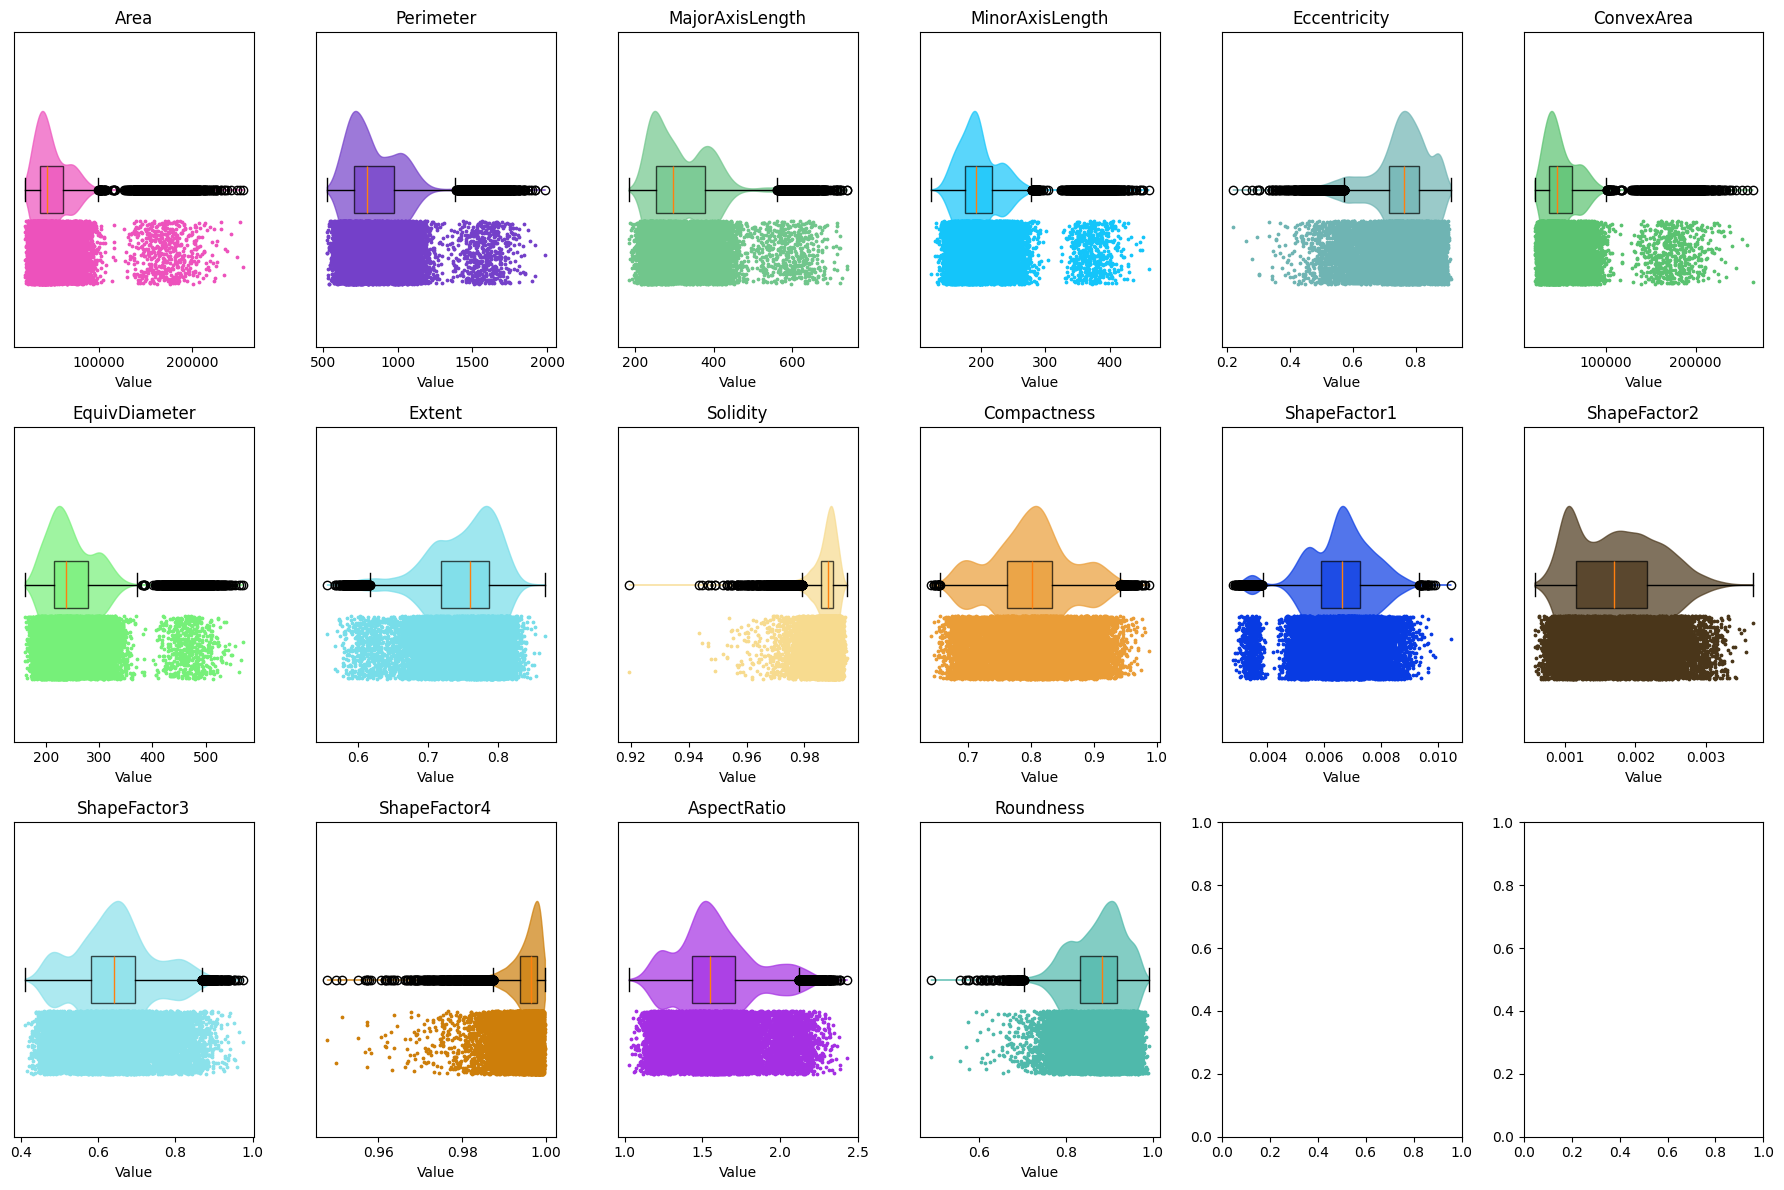

<Figure size 640x480 with 0 Axes>

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import random 

def plot_boxplot(df, cols: list[str]=[], figsize: tuple = (18, 12), max_cols : int=6 , 
                     scatter:bool=True, 
                     violin:bool= True, 
                     violin_args: dict = {},
                     boxplot_args: dict = {}):

        default_violin_args = {
             "points": 500, 
             "showmeans": False, 
             "showextrema": False, 
             "showmedians":False, 
             "vert":False
        }

        default_boxplot_args = {
            "patch_artist": True, 
            "vert":False
        }

        violin_args = {**default_violin_args, **violin_args}
        boxplot_args = {**default_boxplot_args, **boxplot_args}

        cols = cols if cols else list(df.columns)


        #sbn.set_theme(style="whitegrid")
        colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(cols))]

        n_rows = int(len(cols)/max_cols) + (len(cols)%max_cols>0)
        n_cols = max_cols

        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)

        plt.figure()

        for idx, column in enumerate(cols):
            ax = axes[idx // n_cols, idx % n_cols]

            bp = ax.boxplot(df[column], **boxplot_args)
            bp['boxes'][0].set_facecolor(colors[idx])
            bp['boxes'][0].set_alpha(0.7)

            if violin:
                vp = ax.violinplot(df[column], **violin_args)
                vp['bodies'][0].set_color(colors[idx])
                vp['bodies'][0].set_alpha(0.7)

            if scatter:
                y = np.full(len(df[column]), 0.8) + np.random.uniform(low=-.1, high=.1, size=len(df[column]))
                ax.scatter(df[column], y, s=3, c=colors[idx])

            ax.set_title(column)
            ax.set_yticks([])
            ax.set_xlabel("Value")


        fig.tight_layout()
        plt.show()

plot_boxplot(df_raw, cols=[ c for c in df_raw.columns if c not in ["Class"] ])

## Distribucion por clase
---

<Figure size 640x480 with 0 Axes>

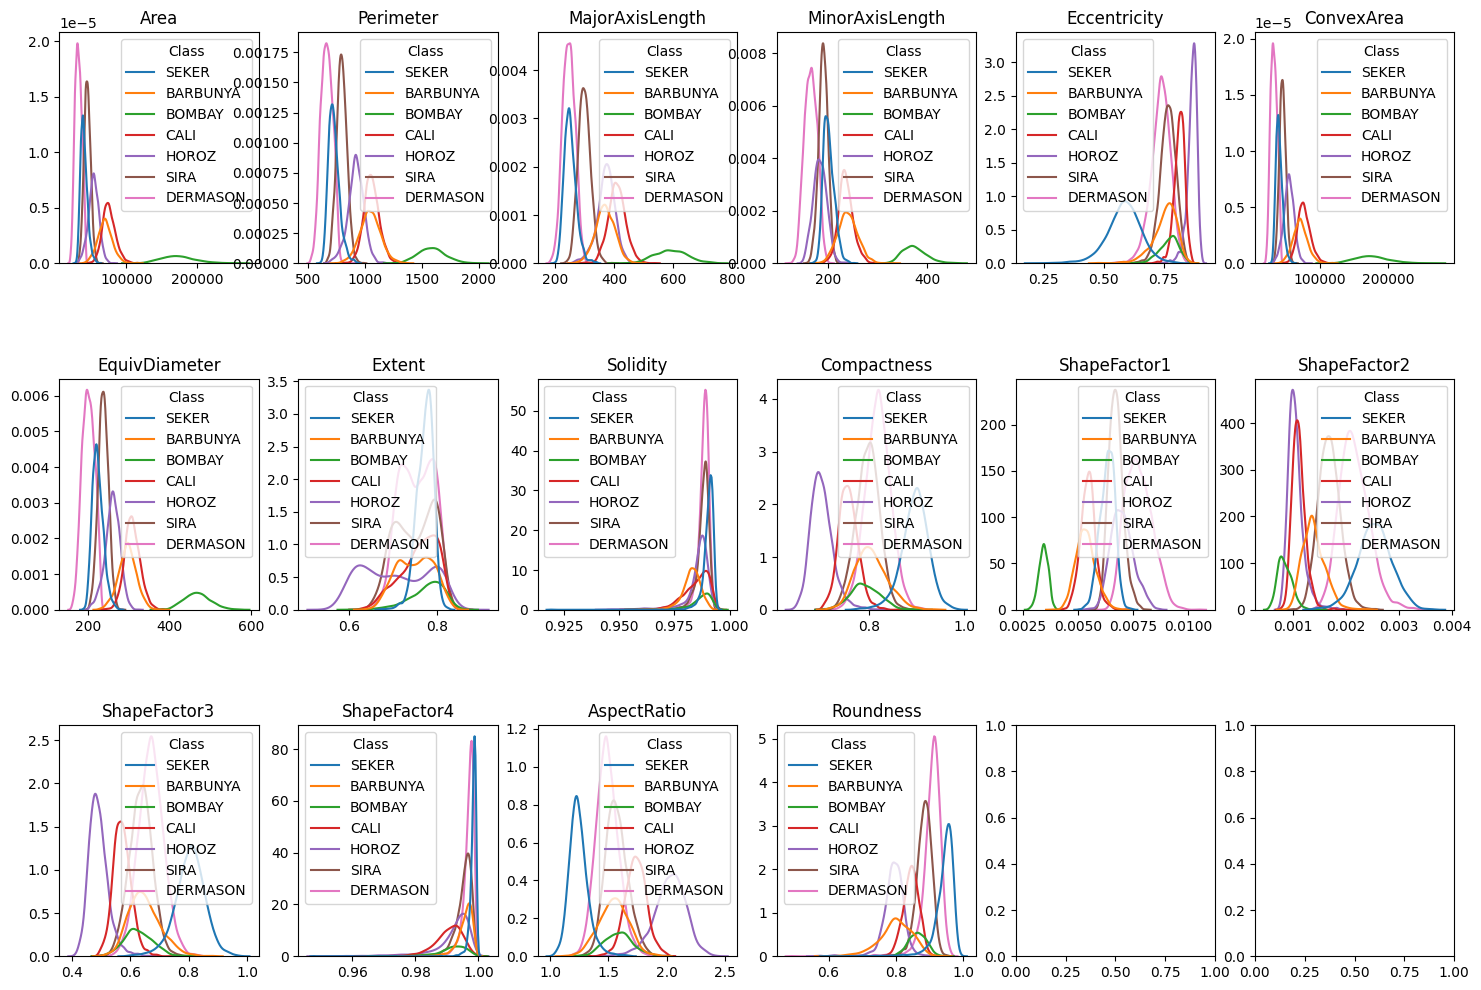

In [75]:
def plot_distributions(df, y_col: str, cols: list[str] =[], figsize: tuple = (18, 12), max_cols : int=6 , args: dict = {}):

    if not cols:
        cols = list(df.columns)
        cols.remove(y_col)

    n_rows = int(len(cols)/max_cols) + (len(cols)%max_cols>0)
    n_cols = max_cols

    plt.figure()
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5)
    
    for i, col in enumerate(cols):
        f = i // n_cols
        c = i % n_cols
        
        sns.kdeplot(df, x=col, hue=y_col, ax=axs[f, c])
        axs[f, c].set_title(col)
        axs[f, c].set_xlabel('')
        axs[f, c].set_ylabel('')
    plt.show()

plot_distributions(df_raw, y_col="Class", cols=[ c for c in df_raw.columns if c not in ["Class"] ])  

## Cantidad de datos por clases
---

([<matplotlib.patches.Wedge at 0x20f53677bf0>,
 [Text(0.751679329714481, 0.8031053388441571, 'SEKER'),
  Text(-0.6870007945063251, 0.8590866710336497, 'BARBUNYA'),
  Text(-1.0822213746170437, -0.1969692776094701, 'BOMBAY'),
  Text(-0.505904905488525, -0.9767600660359979, 'CALI'),
  Text(0.37029123837251354, -1.0358013317159573, 'HOROZ'),
  Text(0.9400104575468422, -0.5712970678224916, 'SIRA'),
  Text(1.092025607090488, -0.1322122288544125, 'DERMASON')],
 [Text(0.4100069071169896, 0.43805745755135844, '26.1%'),
  Text(-0.3747277060943591, 0.46859272965471793, '19.4%'),
  Text(-0.5903025679729329, -0.10743778778698368, '14.9%'),
  Text(-0.2759481302664681, -0.532778217837817, '14.2%'),
  Text(0.2019770391122801, -0.5649825445723403, '12.0%'),
  Text(0.5127329768437321, -0.3116165824486317, '9.7%'),
  Text(0.5956503311402661, -0.0721157611933159, '3.8%')])

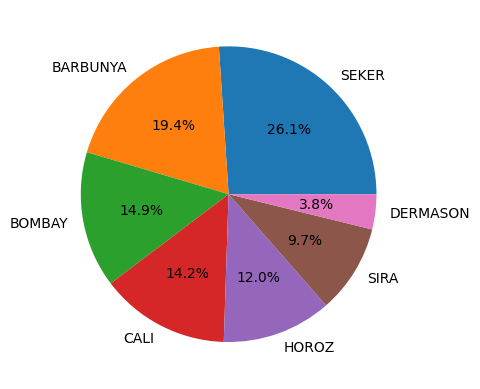

In [76]:
plt.pie(df_raw["Class"].value_counts(), labels=list(df_raw["Class"].unique()), autopct='%1.1f%%' )

# Encoding de variables
---

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_raw["Class"])
df_raw["ClassEncoded"] = le.transform(df_raw["Class"])
df_raw.drop("Class",axis=1, inplace=True)


## Matriz de correlacion
---

<Axes: >

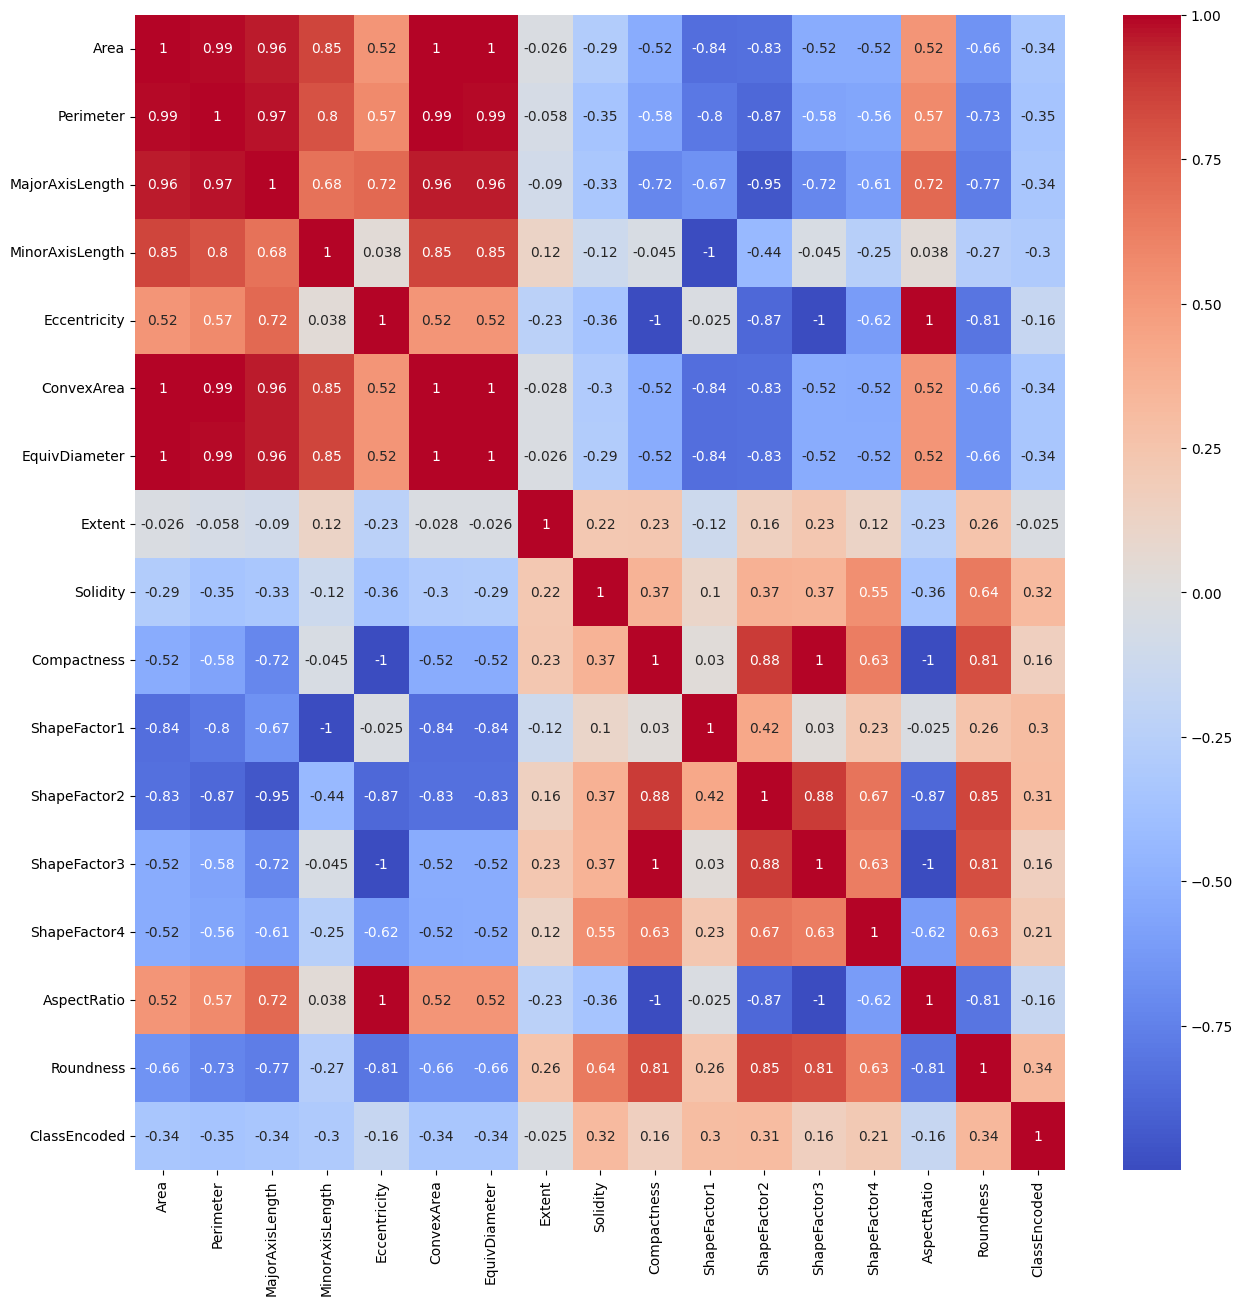

In [78]:
plt.figure(figsize=(15,15))
sns.heatmap(df_raw.corr(method="spearman"), annot=True, cmap="coolwarm")

# Split del dataset
---

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

y_col = "ClassEncoded"
x_cols = [c for c in df_raw.columns if c != y_col]

x_train, x_test, y_train, y_test = train_test_split(df_raw[x_cols], df_raw[y_col], test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((10888, 16), (2723, 16), (10888,), (2723,))

# Normalizacion
---


In [80]:
def scale_df(train, test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(train)
    x_test_scaled = scaler.transform(test)
    return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_df(x_train, x_test)

# Generando Dummies Variables
---
Generamos dummy vars para la variable objetivo

In [107]:
import tensorflow as tf
y_train_dummy = tf.keras.utils.to_categorical(y_train, num_classes=len(df_raw["ClassEncoded"].unique()))
y_test_dummy = tf.keras.utils.to_categorical(y_test, num_classes=len(df_raw["ClassEncoded"].unique()))

# Optuna
---
<p> Utilizamos optuna para generar el mejor modelo posible </p>

In [110]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

def target_class(trial: optuna.trial.Trial , x_train, x_test, y_train, y_test, batch_size=50, epochs=10):
    
    num_capas = trial.suggest_int("num_layers", 1, 4)

    model = Sequential()
    for i in range(num_capas):
        num_conexiones = trial.suggest_int(f"n_units_layer_{i}", 4, 200)
        model.add(Dense(num_conexiones, activation="relu"))
    
    model.add(Dense(7, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[tf.keras.metrics.AUC(curve="ROC")])

    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)
    model.summary()
    scores = model.evaluate(x_test, y_test, verbose=0)
    return scores

study = optuna.create_study(directions=["minimize", "maximize"])

study.optimize( 
    lambda trial: target_class(
        trial, 
        x_train=x_train_scaled, 
        x_test=x_test_scaled, 
        y_train=y_train_dummy, 
        y_test=y_test_dummy
    ), 
    n_trials=1
)


[I 2024-04-24 21:38:05,295] A new study created in memory with name: no-name-84d73bc2-694a-4b44-b5df-99917c561958


Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - auc_33: 0.9046 - loss: 1.0024 - val_auc_33: 0.9948 - val_loss: 0.2367
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - auc_33: 0.9943 - loss: 0.2324 - val_auc_33: 0.9949 - val_loss: 0.2177
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - auc_33: 0.9956 - loss: 0.2058 - val_auc_33: 0.9954 - val_loss: 0.2050
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - auc_33: 0.9952 - loss: 0.2039 - val_auc_33: 0.9961 - val_loss: 0.1951
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - auc_33: 0.9953 - loss: 0.2064 - val_auc_33: 0.9952 - val_loss: 0.2017
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - auc_33: 0.9958 - loss: 0.1926 - val_auc_33: 0.9949 - val_loss: 0.2149
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - auc_33: 0.9957 - loss: 0.1933 - val_auc_33: 0.9953 - val_loss: 0.2001
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - auc_33: 0.9962 - loss: 0.1803 - val_auc_33: 0.9957 - val_loss: 0.1973


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_116 (Dense)               │ (50, 46)               │           782 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (50, 60)               │         2,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (50, 60)               │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (50, 7)                │           427 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,069 (90.12 KB)

 Trainable params: 7,689 (30.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,380 (60.08 KB)

[I 2024-04-24 21:39:07,066] Trial 0 finished with values: [0.19023534655570984, 0.9960599541664124] and parameters: {'num_layers': 3, 'n_units_layer_0': 46, 'n_units_layer_1': 60, 'n_units_layer_2': 60}. 


# Generando el Modelo
---

In [118]:
from tensorflow.keras.models import Model   
from tensorflow.keras.layers import Activation

def make_model(input_shape, n_classes):
  inp = Input(shape=input_shape)
  h1 = Dense(57, activation='relu')(inp)
  h2 = Dense(81, activation='relu')(h1)
  h3 = Dense(69, activation='relu')(h2)
  
  out = Dense(n_classes, activation='softmax')(h3)
  model = Model(inp, out)
  model.compile('adam', loss="categorical_crossentropy", metrics=[tf.keras.metrics.AUC(curve="ROC")])
  return model

n_features = x_train_scaled.shape[1]
n_classes = len(df_raw["ClassEncoded"].unique())
m = make_model((n_features,), n_classes)
m.summary()

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)     │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 57)             │           969 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 81)             │         4,698 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 69)             │         5,658 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 7)              │           490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,815 (46.15 KB)

 Trainable params: 11,815 (46.15 KB)

 Non-trainable params: 0 (0.00 B)

# Corriendo el modelo
---

In [119]:
m.fit(x_train, y_train_dummy, validation_data=(x_test, y_test_dummy), epochs=10, batch_size=50)

Epoch 1/10


ValueError: Could not interpret loss identifier: asdasd